In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

In [2]:
# download from https://evictionlab.org/get-the-data/
# Choose VA => choose "all.csv" (Change the file name to 'VA.csv')
# Choose VA => choose "cities.csv" (Change the file name to 'cities_VA.csv')
df = pd.read_csv('block-groups_VA.csv')

In [3]:
df_clean = df.dropna(axis=0, how='any')

In [4]:
df_clean = df_clean[df_clean['eviction-rate']<100]

In [5]:
HighRankCity = ['Richmond city, Virginia', 'Hampton city, Virginia', 'Newport News city, Virginia', 'Norfolk city, Virginia', 'Chesapeake city, Virginia']

In [6]:
df_clean.columns

Index(['GEOID', 'year', 'name', 'parent-location', 'population',
       'poverty-rate', 'pct-renter-occupied', 'median-gross-rent',
       'median-household-income', 'median-property-value', 'rent-burden',
       'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian',
       'pct-nh-pi', 'pct-multiple', 'pct-other', 'renter-occupied-households',
       'eviction-filings', 'evictions', 'eviction-rate',
       'eviction-filing-rate', 'imputed', 'subbed'],
      dtype='object')

In [7]:
# df_city=df_clean[(df_clean['name']==HighRankCity[0]) | (df_clean['name']==HighRankCity[1]) | (df_clean['name']==HighRankCity[2]) | (df_clean['name']==HighRankCity[3]) | (df_clean['name']==HighRankCity[4])]

In [8]:
df_city=df_clean[df_clean['parent-location']==HighRankCity[1]]   # Analyze 'Richmond city, Virginia' first

df_city_2016=df_clean[(df_clean['parent-location']==HighRankCity[1]) & (df_clean['year']==2016)]

df_city_2016.shape

(77, 26)

In [9]:
df_city_2016

,GEOID,year,name,parent-location,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,pct-nh-pi,pct-multiple,pct-other,renter-occupied-households,eviction-filings,evictions,eviction-rate,eviction-filing-rate,imputed,subbed
81419,516500101031,2016,101.03.1,"Hampton city, Virginia",1173.0,20.05,30.80,1206.0,50391.0,194500.0,...,0.00,13.38,0.00,169.0,37.0,13.0,7.69,21.89,0,0
81423,516500101035,2016,101.03.5,"Hampton city, Virginia",854.0,5.63,17.43,1031.0,88182.0,164500.0,...,0.00,7.73,0.00,93.0,7.0,5.0,5.38,7.53,0,0
81425,516500101041,2016,101.04.1,"Hampton city, Virginia",968.0,0.00,12.94,1402.0,61750.0,190700.0,...,0.00,0.00,0.00,96.0,16.0,8.0,8.33,16.67,0,0
81426,516500101042,2016,101.04.2,"Hampton city, Virginia",1657.0,14.76,23.64,1338.0,56633.0,141000.0,...,0.00,5.43,0.00,136.0,35.0,12.0,8.82,25.74,0,0
81427,516500101043,2016,101.04.3,"Hampton city, Virginia",825.0,8.47,51.98,1582.0,54091.0,138600.0,...,0.00,0.00,0.00,78.0,20.0,7.0,8.97,25.64,0,0
81429,516500101045,2016,101.04.5,"Hampton city, Virginia",1622.0,46.64,70.50,1062.0,25994.0,213400.0,...,0.00,1.23,0.00,603.0,392.0,113.0,18.74,65.01,0,0
81432,516500103042,2016,103.04.2,"Hampton city, Virginia",3316.0,1.35,13.31,1622.0,72893.0,187200.0,...,0.00,3.77,3.50,158.0,18.0,9.0,5.70,11.39,0,0
81433,516500103043,2016,103.04.3,"Hampton city, Virginia",2847.0,13.88,65.24,1088.0,48972.0,237200.0,...,0.00,2.67,0.00,1220.0,405.0,107.0,8.77,33.20,0,0
81434,516500103061,2016,103.06.1,"Hampton city, Virginia",2276.0,1.67,64.02,1144.0,55882.0,232500.0,...,0.00,2.20,0.00,494.0,200.0,33.0,6.68,40.49,0,0
81435,516500103062,2016,103.06.2,"Hampton city, Virginia",1685.0,0.00,82.44,944.0,29643.0,217200.0,...,0.00,0.65,0.00,572.0,460.0,81.0,14.16,80.42,0,0


# Analyze Hampton city, Virginia in 2016

In [10]:
X = df_city_2016.drop(['GEOID','year','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate'],axis=1)
y = df_city_2016['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=100)

rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)

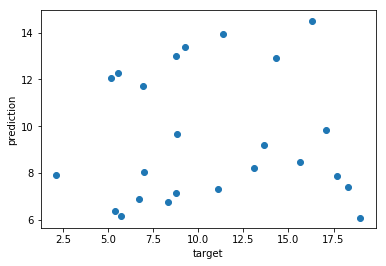

In [11]:
plt.scatter(y_test,predictions)
plt.xlabel("target")
plt.ylabel("prediction")
ymin = np.round( min( min(y_test), min(predictions) ) )
ymax = np.ceil( max( max(y_test), max(predictions) ) )

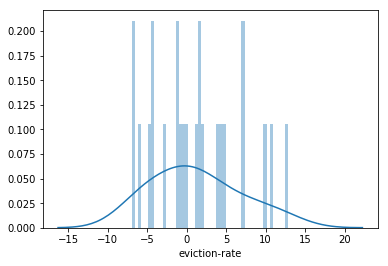

In [12]:
sns.distplot((y_test-predictions),bins=50);

In [13]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: 0.8735635849
Test set score: -0.3666995149
MAE: 4.42715416667
MSE: 31.1896145354
RMSE: 5.58476629192


Feature ranking:
1. feature 5 (median-property-value) (0.214725)
2. feature 9 (pct-hispanic) (0.189091)
3. feature 10 (pct-am-ind) (0.088518)
4. feature 2 (pct-renter-occupied) (0.084952)
5. feature 7 (pct-white) (0.078428)
6. feature 15 (renter-occupied-households) (0.060504)
7. feature 4 (median-household-income) (0.056344)
8. feature 6 (rent-burden) (0.049294)
9. feature 3 (median-gross-rent) (0.036142)
10. feature 13 (pct-multiple) (0.036021)
11. feature 1 (poverty-rate) (0.033266)
12. feature 8 (pct-af-am) (0.026275)
13. feature 0 (population) (0.024504)
14. feature 11 (pct-asian) (0.010910)
15. feature 14 (pct-other) (0.007535)
16. feature 12 (pct-nh-pi) (0.003490)


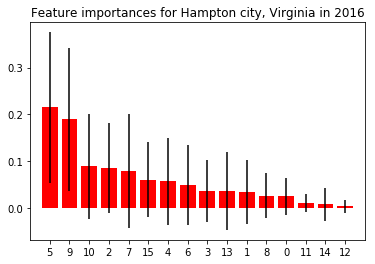

In [14]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Hampton city, Virginia in 2016")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [15]:
ds_importances = pd.Series(importances, name='importances')
ds_std = pd.Series(std, name='std')
ds_columns = pd.Series(X.columns,name='features')
Results = pd.concat([ds_importances, ds_std,ds_columns], axis=1)
Results.to_csv('Result_VA_HamptonCity_2016_rf_all.csv')

In [16]:
# do a quick baseline test
baseline = LinearRegression()
single_tree = DecisionTreeRegressor()
print("CV single tree:", cross_val_score(single_tree, X_train, y_train).mean())
print("CV baseline:", cross_val_score(baseline,X_train, y_train).mean())
print("CV forest:", cross_val_score(rfc, X_train, y_train).mean())

CV single tree: -1.18719373853
CV baseline: -0.376489525639
CV forest: -0.00672055216559


In [17]:
# test score
single_tree.fit(X_train, y_train)
baseline.fit(X_train, y_train)
print("test score single tree:", single_tree.score(X_test, y_test))
print("test score baseline:", baseline.score(X_test, y_test))
print("test score forest:", rfc.score(X_test, y_test))

test score single tree: -0.963465328228
test score baseline: -0.763017593657
test score forest: -0.366699514913


# Use pct-af-am race only

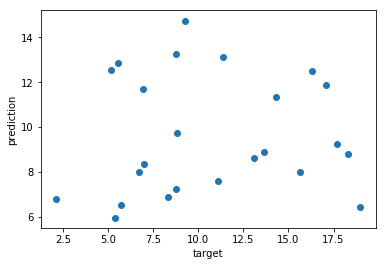

In [18]:
X = df_city_2016.drop(['GEOID','year','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households','pct-nh-pi','pct-other','pct-am-ind','pct-white','population','pct-hispanic','pct-multiple','pct-asian'],axis=1)
y = df_city_2016['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel("target")
plt.ylabel("prediction")
ymin = np.round( min( min(y_test), min(predictions) ) )
ymax = np.ceil( max( max(y_test), max(predictions) ) )

In [19]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: 0.8170377221
Test set score: -0.2762857194
MAE: 4.44437083333
MSE: 29.1262703988
RMSE: 5.39687598512


Feature ranking:
1. feature 4 (median-property-value) (0.275038)
2. feature 1 (pct-renter-occupied) (0.172705)
3. feature 5 (rent-burden) (0.159712)
4. feature 6 (pct-af-am) (0.116320)
5. feature 3 (median-household-income) (0.100280)
6. feature 2 (median-gross-rent) (0.091275)
7. feature 0 (poverty-rate) (0.084670)


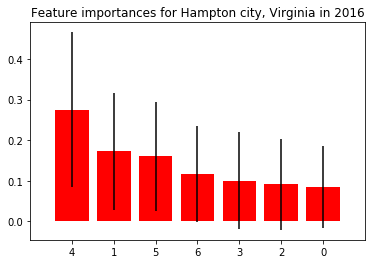

In [20]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Hampton city, Virginia in 2016")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [21]:
ds_importances = pd.Series(importances, name='importances')
ds_std = pd.Series(std, name='std')
ds_columns = pd.Series(X.columns,name='features')
Results = pd.concat([ds_importances, ds_std,ds_columns], axis=1)
Results.to_csv('Result_VA_HamptonCity_2016_rf_pct-af-am.csv')

# Analyze Hampton city, Virginia all 2000-2016 years

In [22]:
X = df_city.drop(['GEOID','year','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate'],axis=1)
y = df_city['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=100)

rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)

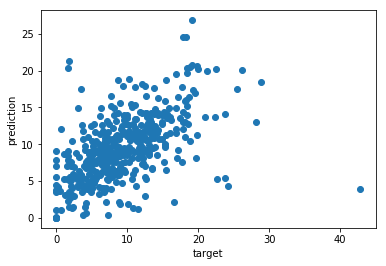

In [23]:
plt.scatter(y_test,predictions)
plt.xlabel("target")
plt.ylabel("prediction")
ymin = np.round( min( min(y_test), min(predictions) ) )
ymax = np.ceil( max( max(y_test), max(predictions) ) )


In [24]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: 0.8709198369
Test set score: 0.2402730321
MAE: 3.34259139621
MSE: 23.4910889878
RMSE: 4.84676066954


Feature ranking:
1. feature 15 (renter-occupied-households) (0.294645)
2. feature 1 (poverty-rate) (0.108312)
3. feature 4 (median-household-income) (0.084285)
4. feature 5 (median-property-value) (0.084217)
5. feature 2 (pct-renter-occupied) (0.053360)
6. feature 9 (pct-hispanic) (0.049612)
7. feature 0 (population) (0.047872)
8. feature 6 (rent-burden) (0.044434)
9. feature 8 (pct-af-am) (0.039990)
10. feature 11 (pct-asian) (0.037959)
11. feature 3 (median-gross-rent) (0.035523)
12. feature 7 (pct-white) (0.033777)
13. feature 13 (pct-multiple) (0.028929)
14. feature 10 (pct-am-ind) (0.023929)
15. feature 14 (pct-other) (0.020510)
16. feature 12 (pct-nh-pi) (0.012646)


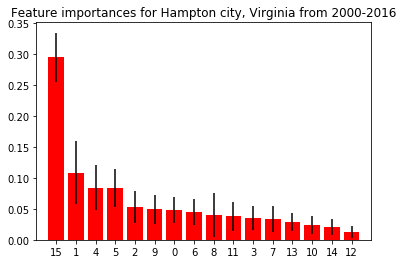

In [25]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Hampton city, Virginia from 2000-2016")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [26]:
ds_importances = pd.Series(importances, name='importances')
ds_std = pd.Series(std, name='std')
ds_columns = pd.Series(X.columns,name='features')
Results = pd.concat([ds_importances, ds_std,ds_columns], axis=1)
Results.to_csv('Result_VA_HamptonCity_years_all.csv')

# Use pct-af-am race only

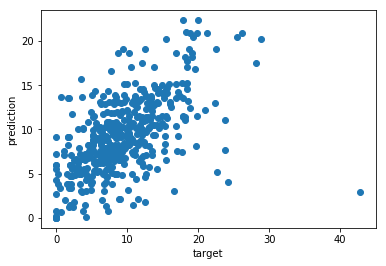

In [27]:
# Use pct-af-am race only
X = df_city.drop(['GEOID','year','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households','pct-nh-pi','pct-other','pct-am-ind','pct-white','population','pct-hispanic','pct-multiple','pct-asian'],axis=1)
y = df_city['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel("target")
plt.ylabel("prediction")
ymin = np.round( min( min(y_test), min(predictions) ) )
ymax = np.ceil( max( max(y_test), max(predictions) ) )

In [28]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: 0.6414249015
Test set score: 0.2797335338
MAE: 3.31685782928
MSE: 22.2709530764
RMSE: 4.71921106504


Feature ranking:
1. feature 0 (poverty-rate) (0.218925)
2. feature 4 (median-property-value) (0.174665)
3. feature 1 (pct-renter-occupied) (0.163309)
4. feature 6 (pct-af-am) (0.138400)
5. feature 3 (median-household-income) (0.135550)
6. feature 5 (rent-burden) (0.096082)
7. feature 2 (median-gross-rent) (0.073070)


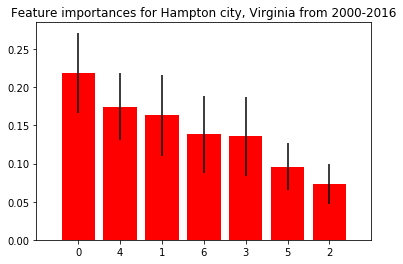

In [29]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Hampton city, Virginia from 2000-2016")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [30]:
ds_importances = pd.Series(importances, name='importances')
ds_std = pd.Series(std, name='std')
ds_columns = pd.Series(X.columns,name='features')
Results = pd.concat([ds_importances, ds_std,ds_columns], axis=1)
Results.to_csv('Result_VA_HamptonCity_years_rf_pct-af-am.csv')

In [31]:
# do a quick baseline test
baseline = LinearRegression()
single_tree = DecisionTreeRegressor()
print("CV single tree:", cross_val_score(single_tree, X_train, y_train).mean())
print("CV baseline:", cross_val_score(baseline,X_train, y_train).mean())
print("CV forest:", cross_val_score(rfc, X_train, y_train).mean())

CV single tree: 0.141648333051
CV baseline: 0.104434047942
CV forest: 0.268949999544


In [32]:
# test score
single_tree.fit(X_train, y_train)
baseline.fit(X_train, y_train)
print("test score single tree:", single_tree.score(X_test, y_test))
print("test score baseline:", baseline.score(X_test, y_test))
print("test score forest:", rfc.score(X_test, y_test))

test score single tree: 0.23767195663
test score baseline: 0.162538004626
test score forest: 0.279733533754


# Use pct-white only

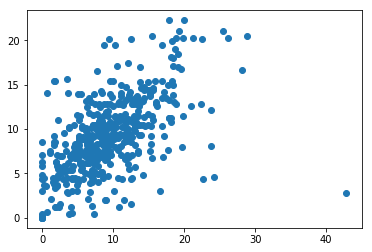

In [33]:
X = df_city.drop(['GEOID','year','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households','pct-nh-pi','pct-other','pct-am-ind','pct-af-am','population','pct-hispanic','pct-multiple','pct-asian'],axis=1)
y = df_city['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)
plt.scatter(y_test,predictions)

In [34]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: 0.6410620871
Test set score: 0.2709150656
MAE: 3.30599804449
MSE: 22.5436239564
RMSE: 4.74801263229


# Use both pct-white and pct-af-am

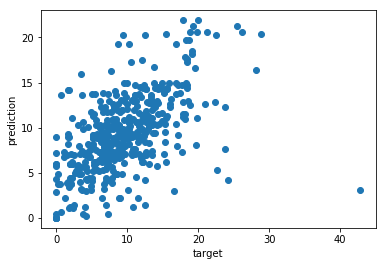

In [35]:
X = df_city.drop(['GEOID','year','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households','pct-nh-pi','pct-other','pct-am-ind','population','pct-hispanic','pct-multiple','pct-asian'],axis=1)
y = df_city['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel("target")
plt.ylabel("prediction")
ymin = np.round( min( min(y_test), min(predictions) ) )
ymax = np.ceil( max( max(y_test), max(predictions) ) )

In [36]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: 0.6395720844
Test set score: 0.2817366996
MAE: 3.31243996136
MSE: 22.2090143157
RMSE: 4.71264408965


Feature ranking:
1. feature 0 (poverty-rate) (0.199966)
2. feature 4 (median-property-value) (0.163326)
3. feature 1 (pct-renter-occupied) (0.144807)
4. feature 3 (median-household-income) (0.138356)
5. feature 7 (pct-af-am) (0.107852)
6. feature 5 (rent-burden) (0.092078)
7. feature 2 (median-gross-rent) (0.077600)
8. feature 6 (pct-white) (0.076015)


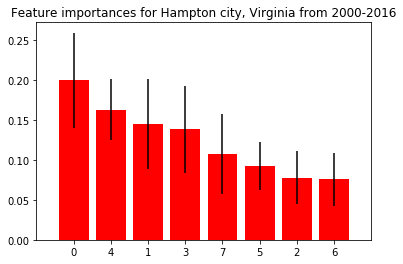

In [37]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Hampton city, Virginia from 2000-2016")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# use pct-hispanic only

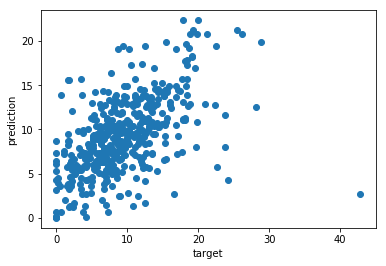

In [38]:
# Use pct-af-am race only
X = df_city.drop(['GEOID','year','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households','pct-nh-pi','pct-other','pct-am-ind','pct-white','pct-af-am','population','pct-multiple','pct-asian'],axis=1)
y = df_city['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel("target")
plt.ylabel("prediction")
ymin = np.round( min( min(y_test), min(predictions) ) )
ymax = np.ceil( max( max(y_test), max(predictions) ) )

In [39]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: 0.6398061987
Test set score: 0.2638670230
MAE: 3.3343125256
MSE: 22.7615525056
RMSE: 4.77090688502


In [40]:
# do a quick baseline test
baseline = LinearRegression()
single_tree = DecisionTreeRegressor()
print("CV single tree:", cross_val_score(single_tree, X_train, y_train).mean())
print("CV baseline:", cross_val_score(baseline,X_train, y_train).mean())
print("CV forest:", cross_val_score(rfc, X_train, y_train).mean())

CV single tree: 0.123519933509
CV baseline: 0.0964869006327
CV forest: 0.271629760802


Feature ranking:
1. feature 0 (poverty-rate) (0.207244)
2. feature 4 (median-property-value) (0.182670)
3. feature 1 (pct-renter-occupied) (0.168328)
4. feature 3 (median-household-income) (0.147729)
5. feature 6 (pct-hispanic) (0.119916)
6. feature 5 (rent-burden) (0.099561)
7. feature 2 (median-gross-rent) (0.074552)


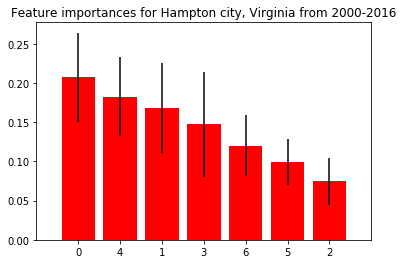

In [41]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Hampton city, Virginia from 2000-2016")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [42]:
ds_importances = pd.Series(importances, name='importances')
ds_std = pd.Series(std, name='std')
ds_columns = pd.Series(X.columns,name='features')
Results = pd.concat([ds_importances, ds_std,ds_columns], axis=1)
Results.to_csv('Result_VA_HamptonCity_years_rf_pct-hispanic.csv')

In [43]:
by_year = df_city.groupby('year')

by_year.mean()

,GEOID,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,...,pct-nh-pi,pct-multiple,pct-other,renter-occupied-households,eviction-filings,evictions,eviction-rate,eviction-filing-rate,imputed,subbed
year,,,,,,,,,,,,,,,,,,,,,
2000,5.165002e+11,1494.255306,10.893367,39.769592,600.316429,37420.612245,82481.632551,25.419388,47.986327,44.199388,...,0.061122,1.932857,0.162959,227.714286,107.530612,18.418367,7.116020,38.410306,0.0,0.0
2001,5.165002e+11,1494.255306,10.893367,39.769592,600.316429,37420.612245,82481.632551,25.419388,47.986327,44.199388,...,0.061122,1.932857,0.162959,228.551020,85.418367,19.857143,7.757755,30.943878,0.0,0.0
2002,5.165002e+11,1494.255306,10.893367,39.769592,600.316429,37420.612245,82481.632551,25.419388,47.986327,44.199388,...,0.061122,1.932857,0.162959,229.214286,82.387755,31.081633,13.973980,34.412755,1.0,0.0
2003,5.165002e+11,1494.255306,10.893367,39.769592,600.316429,37420.612245,82481.632551,25.419388,47.986327,44.199388,...,0.061122,1.932857,0.162959,230.040816,78.357143,30.285714,12.761939,31.634286,1.0,0.0
2004,5.165002e+11,1494.255306,10.893367,39.769592,600.316429,37420.612245,82481.632551,25.419388,47.986327,44.199388,...,0.061122,1.932857,0.162959,230.744898,76.775510,21.806122,9.093878,27.764082,0.0,0.0
2005,5.165002e+11,1488.806429,2.139286,39.661224,818.540612,46197.622449,156314.285918,27.140816,45.822143,44.719490,...,0.114082,1.670000,0.290612,231.642857,79.173469,21.561224,8.667755,27.947755,0.0,0.0
2006,5.165002e+11,1488.806429,2.139286,39.661224,818.540612,46197.622449,156314.285918,27.140816,45.822143,44.719490,...,0.114082,1.670000,0.290612,232.265306,79.683673,21.806122,8.949184,28.637959,0.0,0.0
2007,5.165002e+11,1488.806429,2.139286,39.661224,818.540612,46197.622449,156314.285918,27.140816,45.822143,44.719490,...,0.114082,1.670000,0.290612,233.061224,42.530612,20.255102,7.489388,14.915204,0.0,0.0
2008,5.165002e+11,1488.806429,2.139286,39.661224,818.540612,46197.622449,156314.285918,27.140816,45.822143,44.719490,...,0.114082,1.670000,0.290612,233.785714,43.377551,21.653061,8.218469,15.157857,0.0,0.0


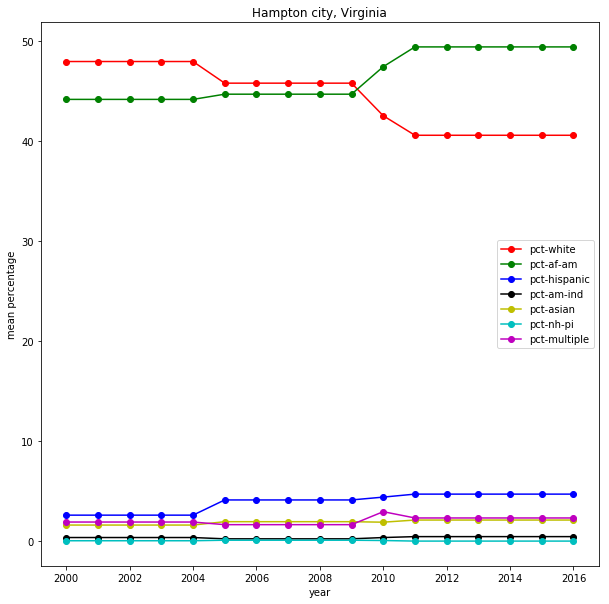

In [44]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
ax.plot(np.array(range(2000,2017)),by_year.mean()['pct-white'].as_matrix(),'-ro',label = 'pct-white')
ax.plot(np.array(range(2000,2017)),by_year.mean()['pct-af-am'].as_matrix(),'-go',label = 'pct-af-am')
ax.plot(np.array(range(2000,2017)),by_year.mean()['pct-hispanic'].as_matrix(),'-bo',label = 'pct-hispanic')
ax.plot(np.array(range(2000,2017)),by_year.mean()['pct-am-ind'].as_matrix(),'-ko',label = 'pct-am-ind')
ax.plot(np.array(range(2000,2017)),by_year.mean()['pct-asian'].as_matrix(),'-yo',label = 'pct-asian')
ax.plot(np.array(range(2000,2017)),by_year.mean()['pct-nh-pi'].as_matrix(),'-co',label = 'pct-nh-pi')
ax.plot(np.array(range(2000,2017)),by_year.mean()['pct-multiple'].as_matrix(),'-mo',label = 'pct-multiple')
plt.legend(fontsize="xx-large")
plt.title('Hampton city, Virginia')
plt.xlabel("year")
plt.ylabel("mean percentage")
ax.legend()
plt.show()
fig.savefig('Fig_VA_HamptonCity_races.jpg')

Text(0,0.5,'mean eviction-rate')

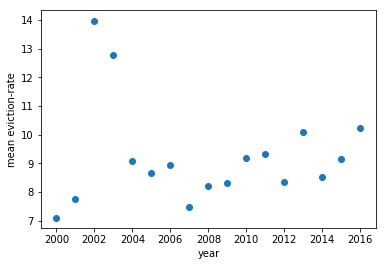

In [45]:
plt.scatter(np.array(range(2000,2017)),by_year.mean()['eviction-rate'].as_matrix())
plt.xlabel("year")
plt.ylabel('mean eviction-rate')


In [46]:
by_year.mean().columns

Index(['GEOID', 'population', 'poverty-rate', 'pct-renter-occupied',
       'median-gross-rent', 'median-household-income', 'median-property-value',
       'rent-burden', 'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind',
       'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other',
       'renter-occupied-households', 'eviction-filings', 'evictions',
       'eviction-rate', 'eviction-filing-rate', 'imputed', 'subbed'],
      dtype='object')

Text(0,0.5,'mean rent-burden')

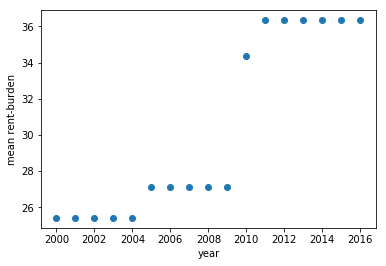

In [47]:
plt.scatter(np.array(range(2000,2017)),by_year.mean()['rent-burden'].as_matrix())
plt.xlabel("year")
plt.ylabel('mean rent-burden')

Text(0,0.5,'mean median-household-income')

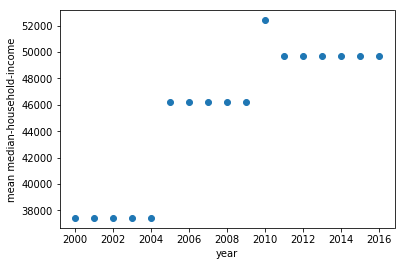

In [48]:
plt.scatter(np.array(range(2000,2017)),by_year.mean()['median-household-income'].as_matrix())
plt.xlabel("year")
plt.ylabel('mean median-household-income')

Text(0,0.5,'population')

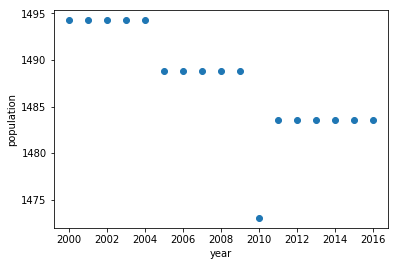

In [49]:
plt.scatter(np.array(range(2000,2017)),by_year.mean()['population'].as_matrix())
plt.xlabel("year")
plt.ylabel('population')

Text(0,0.5,'poverty-rate')

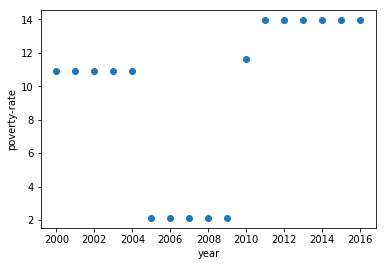

In [50]:
plt.scatter(np.array(range(2000,2017)),by_year.mean()['poverty-rate'].as_matrix())
plt.xlabel("year")
plt.ylabel('poverty-rate')

Text(0,0.5,'pct-renter-occupied')

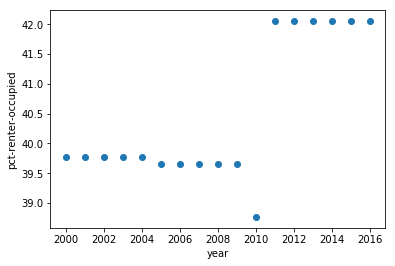

In [51]:
plt.scatter(np.array(range(2000,2017)),by_year.mean()['pct-renter-occupied'].as_matrix())
plt.xlabel("year")
plt.ylabel('pct-renter-occupied')

Text(0,0.5,'median-gross-rent')

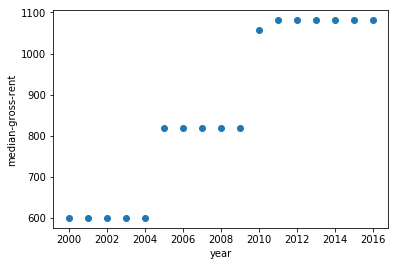

In [52]:
plt.scatter(np.array(range(2000,2017)),by_year.mean()['median-gross-rent'].as_matrix())
plt.xlabel("year")
plt.ylabel('median-gross-rent')

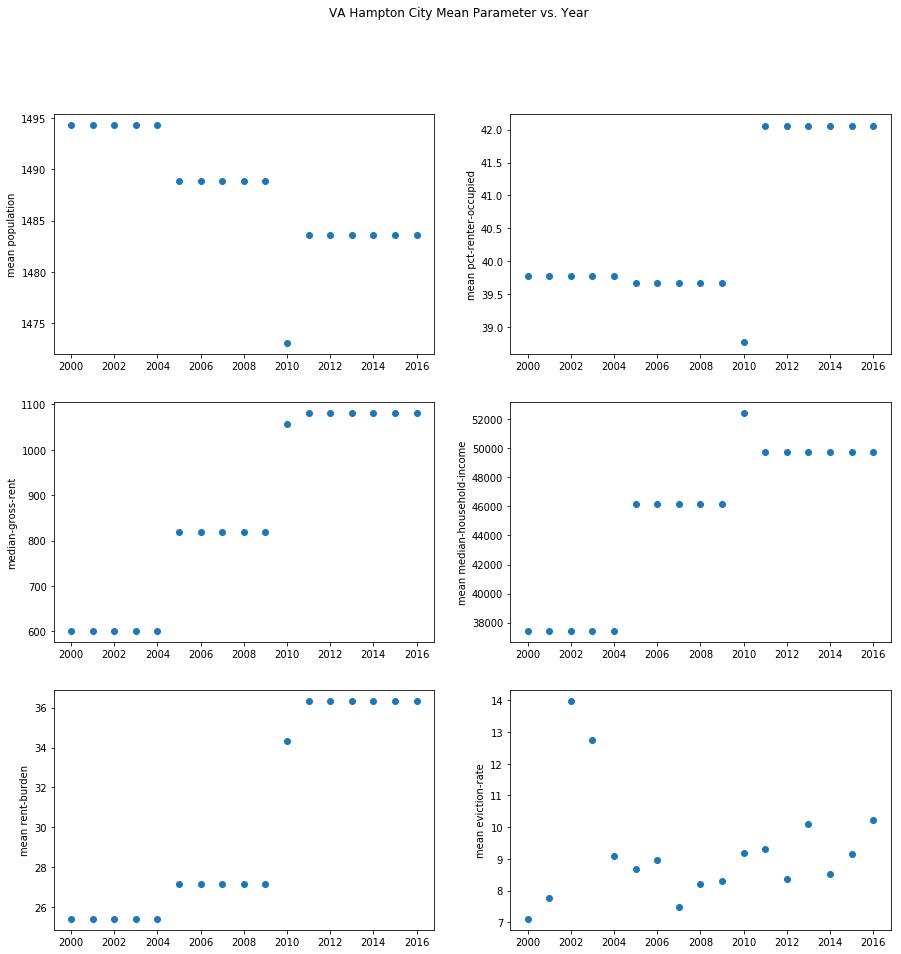

In [53]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15,15))

fig.suptitle('VA Hampton City Mean Parameter vs. Year')

ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

ax0.scatter(np.array(range(2000,2017)),by_year.mean()['population'].as_matrix())
ax0.set_ylabel('mean population')

ax1.scatter(np.array(range(2000,2017)),by_year.mean()['pct-renter-occupied'].as_matrix())
ax1.set_ylabel('mean pct-renter-occupied')

ax2.scatter(np.array(range(2000,2017)),by_year.mean()['median-gross-rent'].as_matrix())
ax2.set_ylabel('median-gross-rent')

ax3.scatter(np.array(range(2000,2017)),by_year.mean()['median-household-income'].as_matrix())
ax3.set_ylabel('mean median-household-income')

ax4.scatter(np.array(range(2000,2017)),by_year.mean()['rent-burden'].as_matrix())
ax4.set_ylabel('mean rent-burden')

ax5.scatter(np.array(range(2000,2017)),by_year.mean()['eviction-rate'].as_matrix())
ax5.set_ylabel('mean eviction-rate')

fig.savefig('Fig_VA_HamptonCity_YearMean.jpg')